In [ ]:
'''
Código criado por Júlia Nogueira em 06/09/2021
Atualizado pela última vez em 07/09/2021

Objetivo: Aplicação de Random Forests a um problema de regressão:
Predição da quantidade de ácido adsorvido.

Utiliza os dados do trabalho: 
"Deep neural networks in chemical engineering classrooms to accurately model adsorption equilibrium data"

'''

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import optuna
# import joblib

import sklearn.model_selection
import sklearn.metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# import sys
# import time

In [ ]:
'''# Começa a contar o tempo de processamento
t = time.time()

# Salva a saída do terminal em um arquivo
f = open("RF_output", 'w')
sys.stdout = f'''

In [50]:
# Leitura e conversão dos dados em array
dados_train = np.genfromtxt('Adsorption_Equilibrium_standardized_train_data.txt', skip_header=1)
print("Formato dos dados de treinamento:", dados_train.shape)

dados_test = np.genfromtxt('Adsorption_Equilibrium_standardized_test_data.txt', skip_header=1)
print("Formato dos dados de teste:", dados_test.shape)

# header
with open('Adsorption_Equilibrium_standardized_train_data.txt', 'r') as file:
    header = file.readline().strip() # pegando a primeira linha
header = header.split()
print('Header:', header)

Formato dos dados de treinamento: (63, 5)
Formato dos dados de teste: (32, 5)
Header: ['Co', 'T', 'Mol.SA', 'MolV', 'g/g']


In [51]:
# Embaralhando os dados e separação das entradas e saídas dos modelos
np.random.shuffle(dados_train)
np.random.shuffle(dados_test)

train_data, train_output = dados_train[:, :-1], dados_train[:, -1]
test_data, test_output = dados_test[:, :-1], dados_test[:, -1]

print("Formato dos dados de entrada de treinamento:", train_data.shape)
print("Formato dos dados de entrada de teste:", test_data.shape)
print("Formato dos dados de saída de treinamento:", train_output.shape)
print("Formato dos dados de saída teste:", test_output.shape)

Formato dos dados de entrada de treinamento: (63, 4)
Formato dos dados de entrada de teste: (32, 4)
Formato dos dados de saída de treinamento: (63,)
Formato dos dados de saída teste: (32,)


In [52]:
# Otimização de Hiperparâmetros
def objetivo_rc(trial):
    # Hiperparâmetros de busca para RF
    rf_min_samples_leaf = trial.suggest_int("rf_min_samples_leaf", 1, 10)
    rf_max_depth = trial.suggest_int("rf_max_depth", 5, 10, log = True)
    rf_n_estimators = trial.suggest_int("rf_n_estimators", 1, 50)

    # Criação do modelo RF
    m = sklearn.ensemble.RandomForestRegressor(max_depth = rf_max_depth, 
    min_samples_leaf = rf_min_samples_leaf, n_estimators = rf_n_estimators)

    # Retornando R² de validação, 20% dos dados de treino
    train__data, val_data, train__output, val_output = sklearn.model_selection.train_test_split(train_data, train_output, test_size=0.2, random_state=101) 
    
    m.fit(train__data, train__output)
    predictions_optimization = m.predict(val_data)
    r2 = sklearn.metrics.r2_score(val_output, predictions_optimization)

    return r2

# Resultados função objetivo
study_rc = optuna.create_study(direction="maximize")
n_trials = 40
print("Nº Iterações Otimização:", n_trials)
study_rc.optimize(objetivo_rc, n_trials=n_trials)
print("Hiperparâmetros Otimizados:", study_rc.best_params)

[I 2021-09-06 18:46:45,642] A new study created in memory with name: no-name-4b038cc1-41d7-4d26-adc4-a4d6506fdb9a


Nº Iterações Otimização: 40


[I 2021-09-06 18:46:45,829] Trial 0 finished with value: 0.8844938038475211 and parameters: {'rf_min_samples_leaf': 2, 'rf_max_depth': 5, 'rf_n_estimators': 34}. Best is trial 0 with value: 0.8844938038475211.
[I 2021-09-06 18:46:45,868] Trial 1 finished with value: 0.871766153102038 and parameters: {'rf_min_samples_leaf': 4, 'rf_max_depth': 6, 'rf_n_estimators': 16}. Best is trial 0 with value: 0.8844938038475211.
[I 2021-09-06 18:46:45,918] Trial 2 finished with value: 0.8315112584403003 and parameters: {'rf_min_samples_leaf': 8, 'rf_max_depth': 10, 'rf_n_estimators': 21}. Best is trial 0 with value: 0.8844938038475211.
[I 2021-09-06 18:46:45,962] Trial 3 finished with value: 0.8736674658750117 and parameters: {'rf_min_samples_leaf': 1, 'rf_max_depth': 7, 'rf_n_estimators': 14}. Best is trial 0 with value: 0.8844938038475211.
[I 2021-09-06 18:46:46,003] Trial 4 finished with value: 0.771403604788967 and parameters: {'rf_min_samples_leaf': 8, 'rf_max_depth': 7, 'rf_n_estimators': 6}. 

Hiperparâmetros Otimizados: {'rf_min_samples_leaf': 3, 'rf_max_depth': 5, 'rf_n_estimators': 12}


In [53]:
# Gráficos otimização de hiperparâmetros
fig1 = optuna.visualization.plot_optimization_history(study_rc)
fig1.show()

fig2 = optuna.visualization.plot_slice(study_rc)
fig2.show()

fig3 = optuna.visualization.plot_parallel_coordinate(study_rc)
fig3.show() 

In [54]:
# Criação, treinamento e teste do modelo RF com hiperparâmetros otimizados
m2 = sklearn.ensemble.RandomForestRegressor(max_depth = study_rc.best_params['rf_max_depth'],
min_samples_leaf = study_rc.best_params['rf_min_samples_leaf'],
n_estimators = study_rc.best_params['rf_n_estimators'])

m2.fit(train_data, train_output)  # treinamento
predictions = m2.predict(test_data)  # teste

In [ ]:
'''# Célula alternativa a anterior, que salva o modelo em um arquivo joblib

# Criação, treinamento e teste do modelo RF com hiperparâmetros otimizados
m2 = sklearn.ensemble.RandomForestRegressor(max_depth = study_rc.best_params['rf_max_depth'],
min_samples_leaf = study_rc.best_params['rf_min_samples_leaf'],
n_estimators = study_rc.best_params['rf_n_estimators'])

m2.fit(train_data, train_output)  # treinamento

joblib.dump(m2, "RF_model.joblib")
loaded_model = joblib.load("RF_model.joblib")
predictions = loaded_model.predict(test_data)  # teste '''

In [55]:
# Métricas avaliação modelo
print('Mean Absolute Error:', sklearn.metrics.mean_absolute_error(test_output, predictions))
print('Mean Squared Error:', sklearn.metrics.mean_squared_error(test_output, predictions))
print('Root Mean Squared Error:', np.sqrt(sklearn.metrics.mean_squared_error(test_output, predictions)))
print('R^2:', sklearn.metrics.r2_score(test_output, predictions))

Mean Absolute Error: 0.0251420982452877
Mean Squared Error: 0.0008781629796000506
Root Mean Squared Error: 0.02963381479998906
R^2: 0.7264556432918781


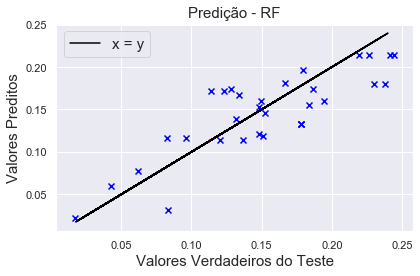

In [40]:
# Gráfico predição
plt.figure()
reta = np.random.uniform(low=0.017, high=0.24, size=(50,))
plt.plot(reta,reta, color='black', label='x = y') #plot reta x = y
plt.scatter(test_output, predictions, color='blue', marker='x')
plt.legend(fontsize=15, loc='best')
plt.xlabel('Valores Verdadeiros do Teste', fontsize=15)
plt.ylabel('Valores Preditos', fontsize=15)
plt.title('Predição - RF', fontsize=15)
plt.tight_layout()
plt.savefig('RF_testpredictions.png')
plt.show()
plt.close()

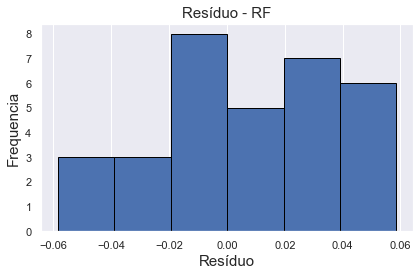

In [41]:
# Gráfico Resíduos
residue = test_output - predictions
plt.figure()
plt.grid(axis='y')
plt.hist(x=residue, bins='auto', ec='black')
plt.ylabel('Frequencia', fontsize=15)
plt.xlabel('Resíduo', fontsize=15)
plt.title('Resíduo - RF', fontsize=15)
plt.tight_layout()
plt.savefig('RF_residue.png')
plt.show()
plt.close()

Variável: Co                   Importância: 0.9096
Variável: Mol.SA               Importância: 0.0566
Variável: MolV                 Importância: 0.0294
Variável: T                    Importância: 0.0044


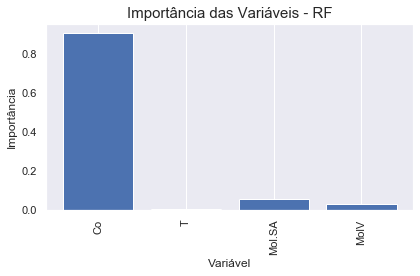

In [42]:
# Importancia das variáveis
importances = list(m2.feature_importances_)
feature_importances = [(feature, round(importance, 4)) for feature, importance in zip(header, importances)]
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)
[print('Variável: {:20} Importância: {}'.format(*pair)) for pair in feature_importances]

# Gráfico importância
sns.set(font_scale=1)
x_values = list(range(len(importances)))
plt.figure()
plt.grid(axis='y')
plt.bar(x_values, importances, orientation='vertical')
plt.xticks(x_values, header, rotation='vertical')
plt.ylabel('Importância')
plt.xlabel('Variável')
plt.title('Importância das Variáveis - RF', fontsize=15)
plt.tight_layout()
plt.savefig('RF_importance.png')
plt.show()
plt.close()

In [43]:
# ----------------- Redução variáveis pela importância -----------------
print("------------------ REDUÇÃO DE VARIÁVEIS -------------------\n")
# Quantidade de variáveis que serão utilizadas na redução
columns = sum(big > 0.02 for big in importances)
# Criando vetor reduzido dados treino
train_data_red = np.zeros((train_data.shape[0], columns))
# Criando vetor reduzido dados teste
test_data_red = np.zeros((test_data.shape[0], columns))
# Criando vetor reduzido header
header_red = []
fix_pos = 0  # Contador dos dados reduzidos
total_importance = 0  # Soma da importância total das variáveis reduzidas
for pos, item in enumerate(importances):
    if item > 0.02:  # Critério para redução
        train_data_red[:, fix_pos] = train_data[:, pos]
        test_data_red[:, fix_pos] = test_data[:, pos]
        header_red.append(header[pos])
        fix_pos = fix_pos + 1
        total_importance = total_importance + item

print("Importância total da versão reduzida:", total_importance)
print("Formato dos dados de entrada de treinamento reduzidos:", train_data_red.shape)
print("Formato dos dados de de entrada de teste reduzidos:", test_data_red.shape)
print("Formato do header reduzido:", len(header_red))
print("Header reduzido:", header_red)

------------------ REDUÇÃO DE VARIÁVEIS -------------------

Importância total da versão reduzida: 0.9955889648607393
Formato dos dados de entrada de treinamento reduzidos: (63, 3)
Formato dos dados de de entrada de teste reduzidos: (32, 3)
Formato do header reduzido: 3
Header reduzido: ['Co', 'Mol.SA', 'MolV']


In [44]:
# Criação, treinamento e teste do modelo RF com hiperparâmetros otimizados
m3 = sklearn.ensemble.RandomForestRegressor(max_depth = study_rc.best_params['rf_max_depth'],
min_samples_leaf = study_rc.best_params['rf_min_samples_leaf'],
n_estimators = study_rc.best_params['rf_n_estimators'])

m3.fit(train_data_red, train_output)  # treinamento
predictions2 = m3.predict(test_data_red)  # teste

In [45]:
# Métricas avaliação modelo
print('Mean Absolute Error:', sklearn.metrics.mean_absolute_error(test_output, predictions2))
print('Mean Squared Error:', sklearn.metrics.mean_squared_error(test_output, predictions2))
print('Root Mean Squared Error:', np.sqrt(sklearn.metrics.mean_squared_error(test_output, predictions2)))
print('R^2:', sklearn.metrics.r2_score(test_output, predictions2))

Mean Absolute Error: 0.030467919228254384
Mean Squared Error: 0.0013151732826735066
Root Mean Squared Error: 0.03626531790393552
R^2: 0.5903286315571157


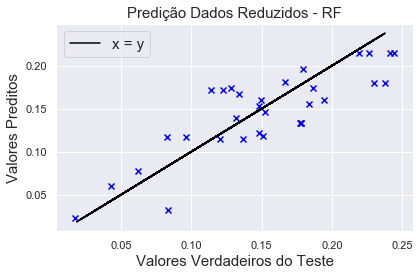

In [46]:
# Gráfico predição
plt.figure()
reta = np.random.uniform(low=0.017, high=0.24, size=(50,))
plt.plot(reta,reta, color='black', label='x = y') #plot reta x = y
plt.scatter(test_output, predictions, color='blue', marker='x')
plt.legend(fontsize=15, loc='best')
plt.xlabel('Valores Verdadeiros do Teste', fontsize=15)
plt.ylabel('Valores Preditos', fontsize=15)
plt.title('Predição Dados Reduzidos - RF', fontsize=15)
plt.tight_layout()
plt.savefig('RF_testpredictions_reduced.png')
plt.show()
plt.close()

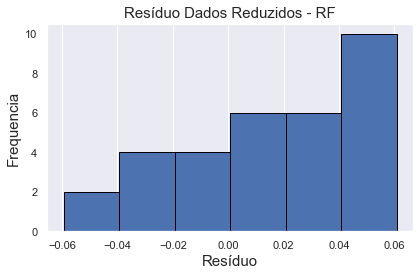

In [47]:
# Gráfico Resíduos
residue2 = test_output - predictions2
plt.figure()
plt.grid(axis='y')
plt.hist(x=residue2, bins='auto', ec='black')
plt.ylabel('Frequencia', fontsize=15)
plt.xlabel('Resíduo', fontsize=15)
plt.title('Resíduo Dados Reduzidos - RF', fontsize=15)
plt.tight_layout()
plt.savefig('RF_residue_reduced.png')
plt.show()
plt.close()

Variável: Co                   Importância: 0.8842
Variável: MolV                 Importância: 0.0797
Variável: Mol.SA               Importância: 0.0362


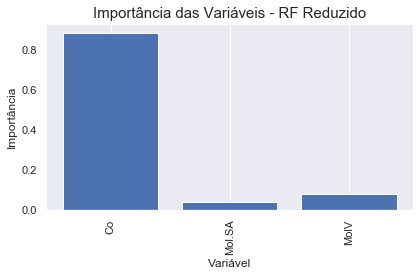

In [48]:
# Importancia das variáveis
importances2 = list(m3.feature_importances_)
feature_importances = [(feature, round(importance, 4)) for feature, importance in zip(header_red, importances2)]
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)
[print('Variável: {:20} Importância: {}'.format(*pair)) for pair in feature_importances]

# Gráfico importância
sns.set(font_scale=1)
x_values = list(range(len(importances2)))
plt.figure()
plt.grid(axis='y')
plt.bar(x_values, importances2, orientation='vertical')
plt.xticks(x_values, header_red, rotation='vertical')
plt.ylabel('Importância')
plt.xlabel('Variável')
plt.title('Importância das Variáveis - RF Reduzido', fontsize=15)
plt.tight_layout()
plt.savefig('RF_importance_reduced.png')
plt.show()
plt.close()

In [ ]:
'''# Finaliza a contagem do tempo
elapsed = time.time() - t
print('Computing time:', elapsed)

# Fecha o arquivo
f.close()'''